# Visualizations

Code to generate graphs/visualizations in the thesis.

## Spectrograms

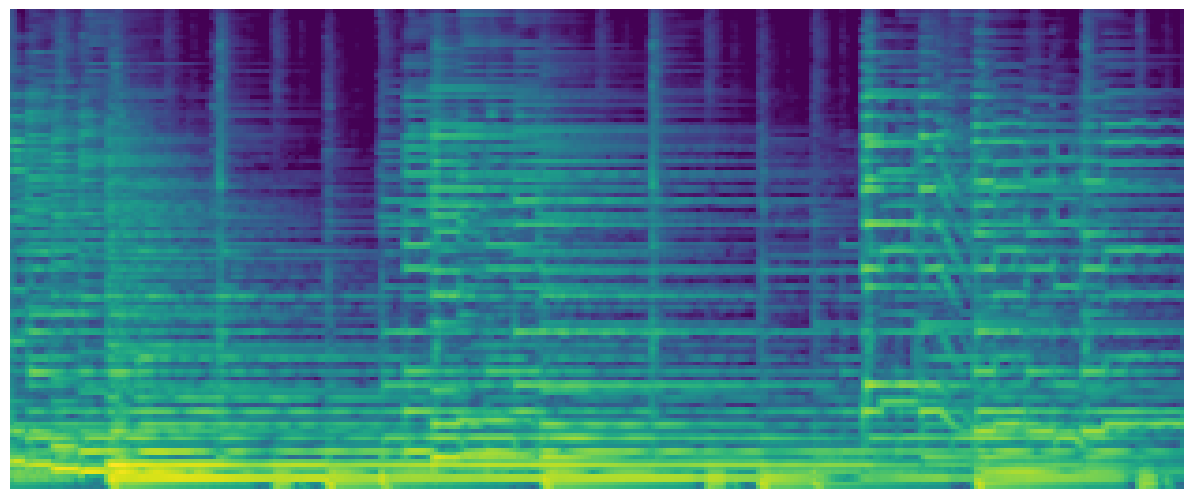

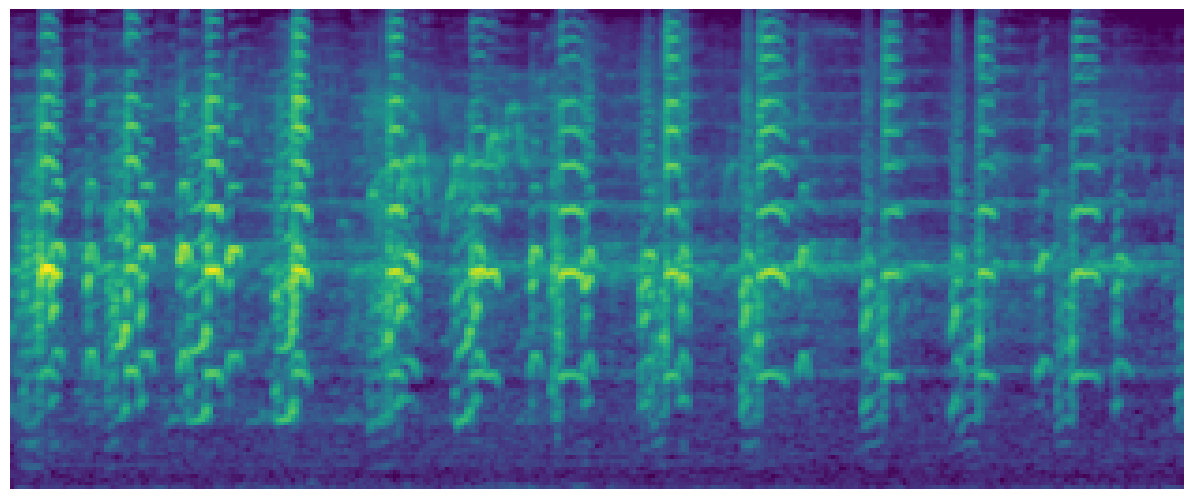

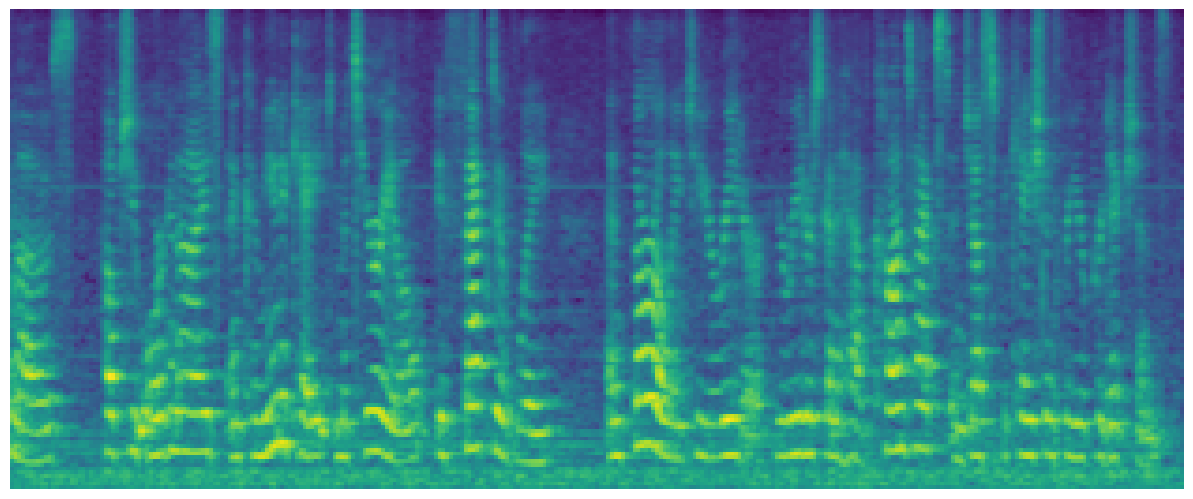

In [34]:
import os
import yt_dlp as youtube_dl
import librosa
import numpy as np
import matplotlib.pyplot as plt

HOME_FOLDER = '/home/user/ss-vq-vae/experiments/visualizations_data/spectrograms/'
SR = 16_000
duration = 10

# Dictionary of YouTube URLs with start and duration for clips
# Clips taken from the Audioset dataset: "Music", "Bird vocalization, bird call, bird song" and "Speech" respectively
rel_paths = {
    'Music': '-0SdAVK79lg.wav',
    'Bird song': 'G8tT-uKj3Ls.wav',
    'Speech': '-5-vmt2iKT0.wav',
}

def process_audio(rel_path):
    full_path = os.path.join(HOME_FOLDER, rel_path)
    
    audio_data, sample_rate = librosa.load(full_path, sr=SR, duration=duration)
    melspectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    return librosa.power_to_db(melspectrogram, ref=np.max)

melspectrograms = {key: process_audio(rel_path) for key, rel_path in rel_paths.items()}

# Generate plots
for i, (key, melspectrogram) in enumerate(melspectrograms.items()):
    fig, axes = plt.subplots(1, figsize=plt.figaspect(melspectrogram))
    
    fig.subplots_adjust(0,0,1,1)
    axes.axis('off')
    axes.imshow(melspectrogram, origin='lower')
    
    # fig.set_size_inches(6, 18)
    fig.savefig(os.path.join(HOME_FOLDER, f"{key}.png"), dpi=100)

## Zero-shot timbre transfer losses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def create_timbre_transfer_loss_graphs(train_paths, valid_paths, zero_valid_paths, labels, colors):
    # Load the data
    train_dfs = [pd.read_csv(path) for path in train_paths]
    valid_dfs = [pd.read_csv(path) for path in valid_paths]
    zero_valid_dfs = [pd.read_csv(path) for path in zero_valid_paths]
    
    # Create figures and axes for the plots
    fig_train, ax_train = plt.subplots(figsize=(10, 6))
    fig_valid, ax_valid = plt.subplots(figsize=(10, 6))
    fig_zero_valid, ax_zero_valid = plt.subplots(figsize=(10, 6))
    
    # Plot training data
    for df, label, color in zip(train_dfs, labels, colors):
        ax_train.plot(df['Step'], df['Value'], label=label, color=color)
    ax_train.set_title('Training Loss over Steps')
    ax_train.set_xlabel('Steps')
    ax_train.set_ylabel('Loss')
    ax_train.set_yscale('log')
    ax_train.legend()
    ax_train.grid(True, which="both", ls="-")
    
    # Plot validation data
    for df, label, color in zip(valid_dfs, labels, colors):
        ax_valid.plot(df['Step'], df['Value'], label=label, color=color)
    ax_valid.set_title('Validation Loss over Steps')
    ax_valid.set_xlabel('Steps')
    ax_valid.set_ylabel('Loss')
    ax_valid.set_yscale('log')
    ax_valid.legend()
    ax_valid.grid(True, which="both", ls="-")
    
    # Plot zero-validation data
    for df, label, color in zip(zero_valid_dfs, labels, colors):
        ax_zero_valid.plot(df['Step'], df['Value'], label=label, color=color)
    ax_zero_valid.set_title('Zero-Validation Loss over Steps')
    ax_zero_valid.set_xlabel('Steps')
    ax_zero_valid.set_ylabel('Loss')
    ax_zero_valid.set_yscale('log')
    ax_zero_valid.legend()
    ax_zero_valid.grid(True, which="both", ls="-")
    
    # Return the graphs in a dictionary
    graphs = {
        'train': {
            'fig': fig_train,
            'ax': ax_train
        },
        'valid': {
            'fig': fig_valid,
            'ax': ax_valid
        },
        'zero_valid': {
            'fig': fig_zero_valid,
            'ax': ax_zero_valid
        },
    }
    
    return graphs


### Original architecture

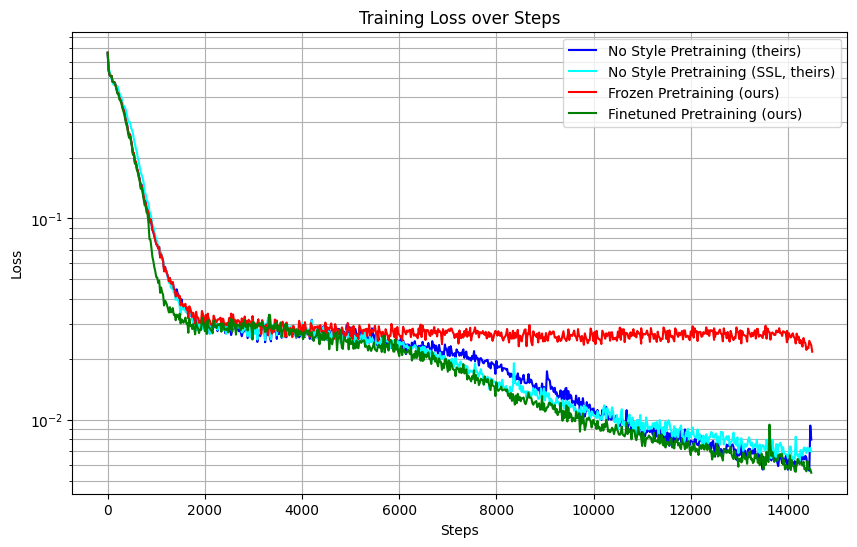

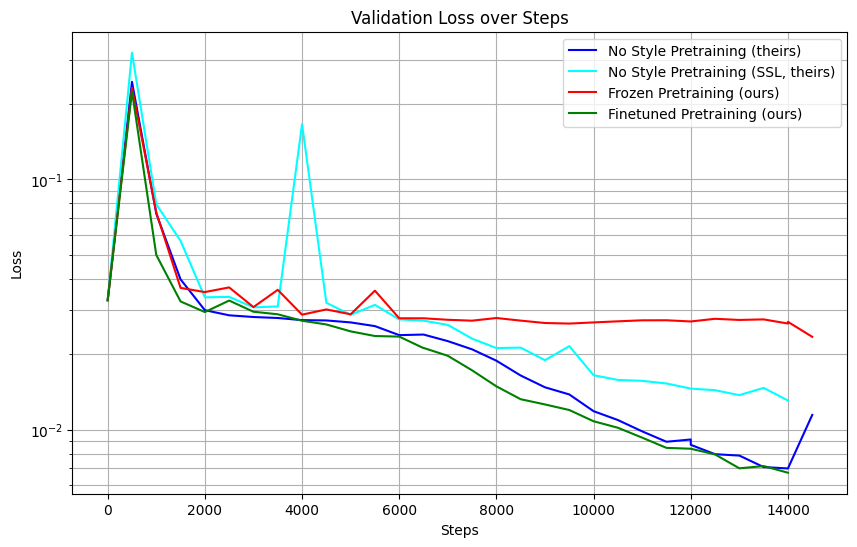

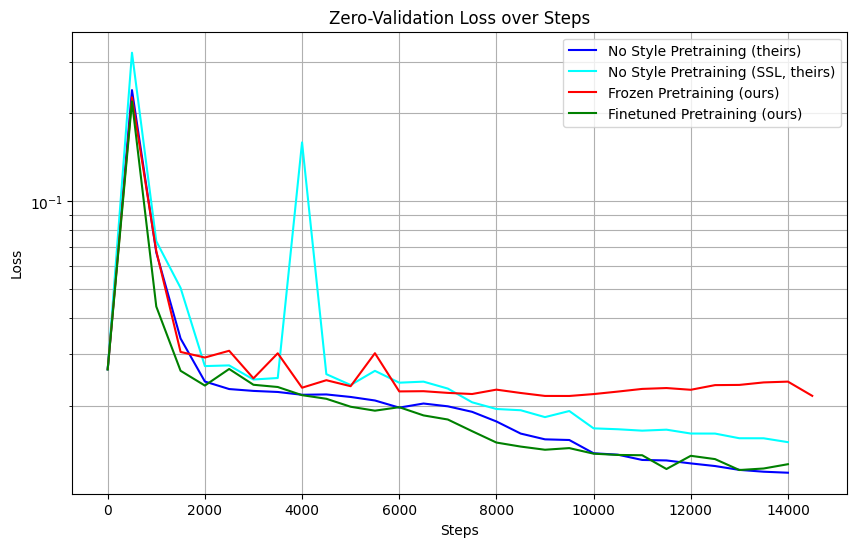

In [4]:
train_paths = [
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-19-11-2023-train.csv',
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-with-ssl-dataloader-07-09-2024-train.csv',
    'visualizations_data/timbre_transfer_data/model-original-frozen-style-pretraining-21-11-2023-train.csv',
    'visualizations_data/timbre_transfer_data/model-original-finetuned-style-pretraining-22-11-2023-train.csv',
]
valid_paths = [
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-19-11-2023-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-with-ssl-dataloader-07-09-2024-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-frozen-style-pretraining-21-11-2023-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-finetuned-style-pretraining-22-11-2023-valid.csv',
]
zero_valid_paths = [
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-19-11-2023-zero-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-no-style-pretraining-with-ssl-dataloader-07-09-2024-zero-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-frozen-style-pretraining-21-11-2023-zero-valid.csv',
    'visualizations_data/timbre_transfer_data/model-original-finetuned-style-pretraining-22-11-2023-zero-valid.csv',
]

labels = ['No Style Pretraining (theirs)', 'No Style Pretraining (SSL, theirs)', 'Frozen Pretraining (ours)', 'Finetuned Pretraining (ours)']
colors = ['blue', 'cyan', 'red', 'green']

timbre_transfer_original_loss_graphs = create_timbre_transfer_loss_graphs(train_paths, valid_paths, zero_valid_paths, labels, colors)

In [5]:
# Export to PDFs

timbre_transfer_original_loss_graphs['train']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/training_loss_plots_log_scale_color_original.pdf')
timbre_transfer_original_loss_graphs['valid']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/validation_loss_plots_log_scale_color_original.pdf')
timbre_transfer_original_loss_graphs['zero_valid']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/zero_validation_loss_plots_log_scale_color_original.pdf')

### COLA-style architecture

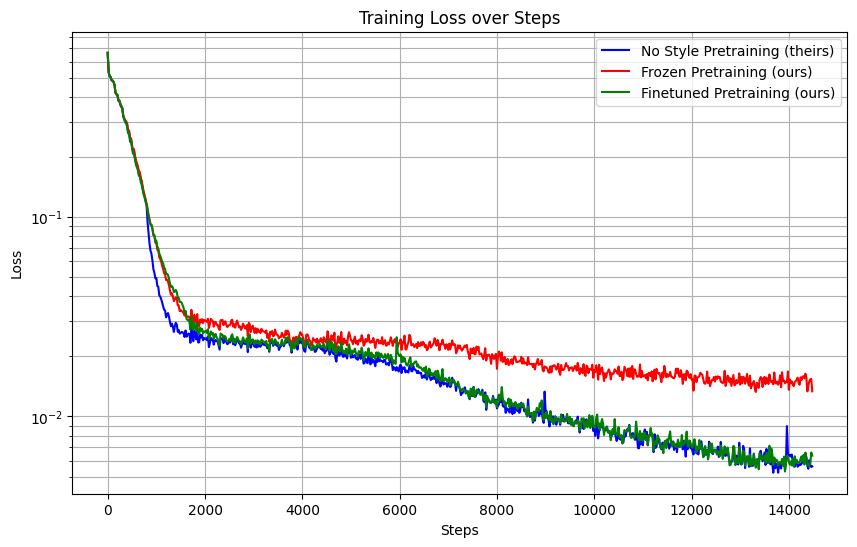

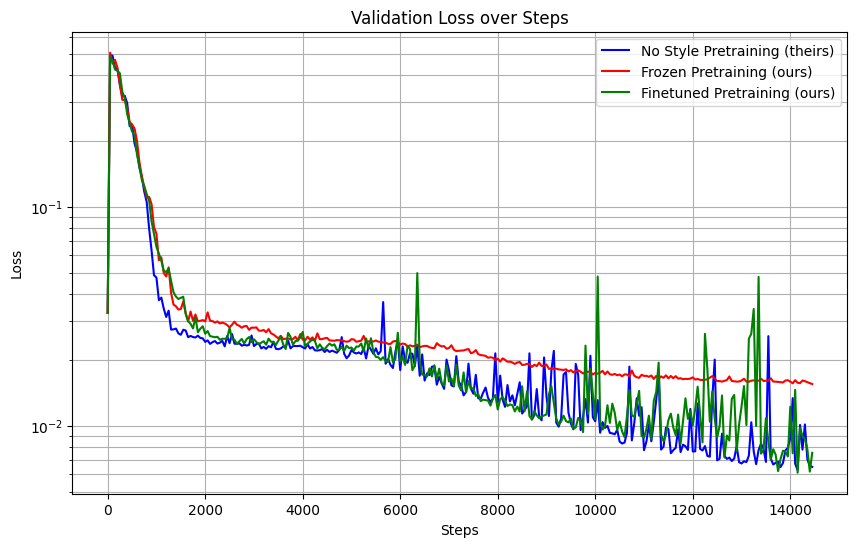

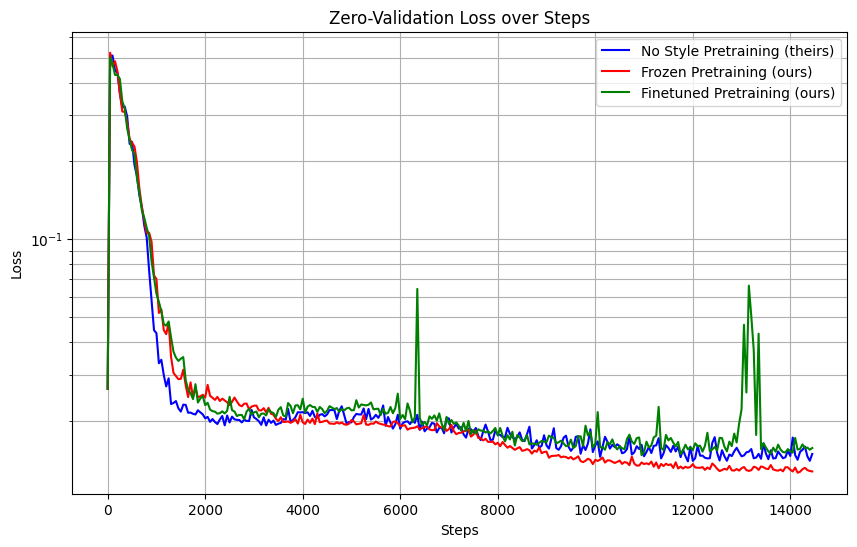

In [6]:
train_paths = [
    'visualizations_data/timbre_transfer_data/model-leaky-relu-no-style-pretraining-30-08-2024-train.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-frozen-style-pretraining-01-09-2024-train.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-finetuned-style-pretraining-29-08-2024-train.csv'
]
valid_paths = [
    'visualizations_data/timbre_transfer_data/model-leaky-relu-no-style-pretraining-30-08-2024-valid.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-frozen-style-pretraining-01-09-2024-valid.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-finetuned-style-pretraining-29-08-2024-valid.csv'
]
zero_valid_paths = [
    'visualizations_data/timbre_transfer_data/model-leaky-relu-no-style-pretraining-30-08-2024-zero-valid.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-frozen-style-pretraining-01-09-2024-zero-valid.csv',
    'visualizations_data/timbre_transfer_data/model-leaky-relu-finetuned-style-pretraining-29-08-2024-zero-valid.csv'
]

labels = ['No Style Pretraining (theirs)', 'Frozen Pretraining (ours)', 'Finetuned Pretraining (ours)']
colors = ['blue', 'red', 'green']

timbre_transfer_cola_loss_graphs = create_timbre_transfer_loss_graphs(train_paths, valid_paths, zero_valid_paths, labels, colors)

In [7]:
# Export to PDFs

timbre_transfer_cola_loss_graphs['train']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/training_loss_plots_log_scale_color.pdf')
timbre_transfer_cola_loss_graphs['valid']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/validation_loss_plots_log_scale_color.pdf')
timbre_transfer_cola_loss_graphs['zero_valid']['fig'].savefig('visualizations_data/timbre_transfer_data/figures/zero_validation_loss_plots_log_scale_color.pdf')

## Style encoder losses

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def create_style_encoder_loss_graphs(train_loss_path, val_loss_path):
    df_train = pd.read_csv(train_loss_path)
    df_val = pd.read_csv(val_loss_path) 
    graphs = {}
    
    # Training Loss (Log Scale)
    fig_train_log, ax_train_log = plt.subplots(figsize=(152 * 0.0393701, 152 * 0.0393701))
    ax_train_log.plot(df_train['Step'], df_train.iloc[:, 1], label='Training Loss', color='blue')
    ax_train_log.set_yscale('log')
    ax_train_log.set_title('Training Loss over Steps (Log Scale)')
    ax_train_log.set_xlabel('Step')
    ax_train_log.set_ylabel('Log Loss')
    ax_train_log.legend()
    ax_train_log.grid(True)
    graphs['training_loss_log'] = {'fig': fig_train_log, 'ax': ax_train_log}
    
    # Validation Loss (Log Scale)
    fig_val_log, ax_val_log = plt.subplots(figsize=(152 * 0.0393701, 152 * 0.0393701))
    ax_val_log.plot(df_val['Step'], df_val.iloc[:, 1], label='Validation Loss', color='red')
    ax_val_log.set_yscale('log')
    ax_val_log.set_title('Validation Loss over Steps (Log Scale)')
    ax_val_log.set_xlabel('Step')
    ax_val_log.set_ylabel('Log Loss')
    ax_val_log.legend()
    ax_val_log.grid(True)
    graphs['validation_loss_log'] = {'fig': fig_val_log, 'ax': ax_val_log}
    
    return graphs


### Original style encoder

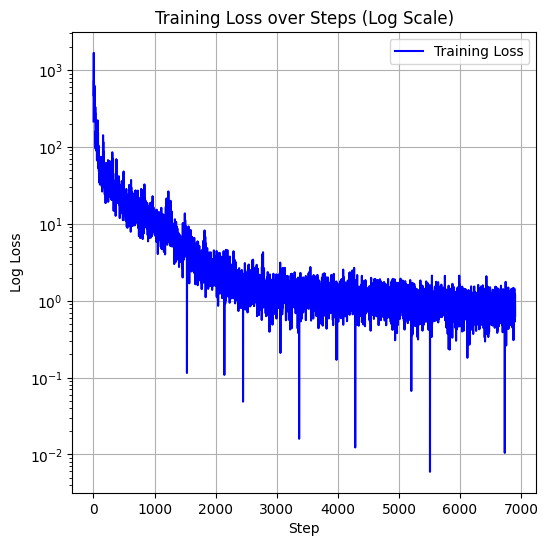

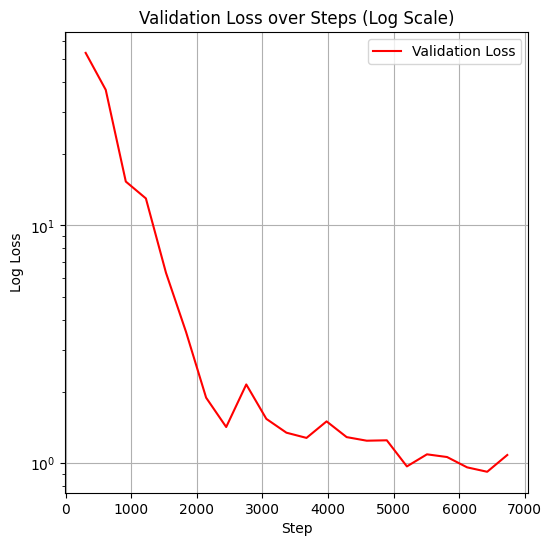

In [16]:
original_train_losses = 'visualizations_data/original_style_encoder_losses/wandb_export_2024-02-17T15_34_08.400+01_00.csv'
original_valid_losses = 'visualizations_data/original_style_encoder_losses/wandb_export_2024-02-17T15_34_00.035+01_00.csv'

original_loss_graphs = create_style_encoder_loss_graphs(original_train_losses, original_valid_losses)

In [17]:
# Export to PDFs

original_loss_graphs['training_loss_log']['fig'].savefig('visualizations_data/original_style_encoder_losses/training_loss_log_graph_original.pdf')
original_loss_graphs['validation_loss_log']['fig'].savefig('visualizations_data/original_style_encoder_losses/validation_loss_log_graph_original.pdf')

### COLA style encoder

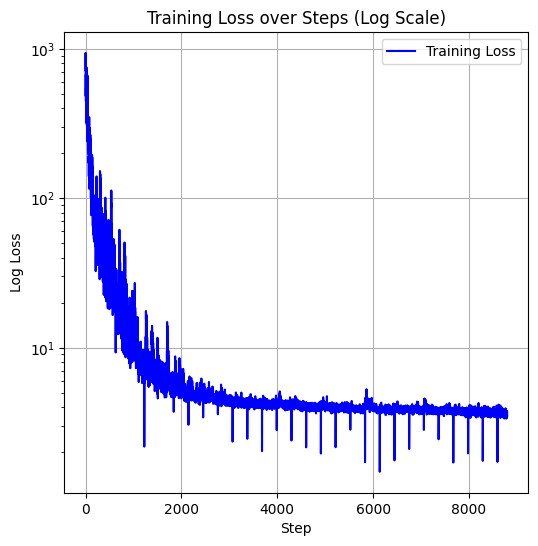

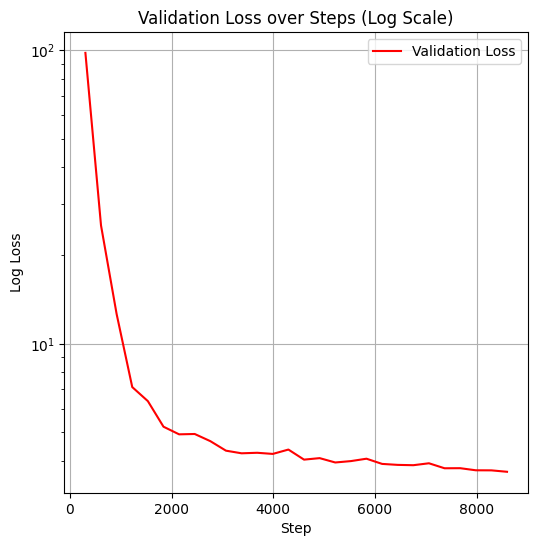

In [18]:
cola_train_losses = 'visualizations_data/cola_style_encoder_losses/wandb_export_2024-02-21T19_49_30.014+01_00.csv'
cola_valid_losses = 'visualizations_data/cola_style_encoder_losses/wandb_export_2024-02-21T19_49_20.064+01_00.csv'

cola_loss_graphs = create_style_encoder_loss_graphs(cola_train_losses, cola_valid_losses)

In [19]:
# Export to PDFs

cola_loss_graphs['training_loss_log']['fig'].savefig('visualizations_data/cola_style_encoder_losses/training_loss_log_scale.pdf')
cola_loss_graphs['validation_loss_log']['fig'].savefig('visualizations_data/cola_style_encoder_losses/validation_loss_log_scale.pdf')

## Content and style preservation

In [8]:
import pandas as pd

style_results_path = 'rnn_style_metric/results-08-09-2024.csv'
content_test_results_path = 'content_metric/test_results-08-09-2024.csv'
content_val2_results_path = 'content_metric/val2_results-08-09-2024.csv'

style_results_df = pd.read_csv(style_results_path)
content_test_results_df = pd.read_csv(content_test_results_path)
content_val2_results_df = pd.read_csv(content_val2_results_path)


In [9]:
# Merge the dataframes on relevant columns
merged_test_df = pd.merge(content_test_results_df, style_results_df, on=["model", "dataset", "ground_path"], how="inner")
merged_val2_df = pd.merge(content_val2_results_df, style_results_df, on=["model", "dataset", "ground_path"], how="inner")

# Combine test and val2 datasets into one dataframe for overall analysis
combined_df = pd.concat([merged_test_df, merged_val2_df], ignore_index=True)


In [10]:
# Extract melody_id and instrument_id from the ground_path for better readability
def extract_ids(path):
    parts = path.split('/')[-1].split('_')
    melody_id = parts[1]
    instrument_id = parts[2].split('.')[0]
    return melody_id, instrument_id

# Add columns for melody_id and instrument_id to the dataframes
combined_df['melody_id'], combined_df['instrument_id'] = zip(*combined_df['ground_path'].apply(extract_ids))

### Most difficult timbres to model

In [11]:
difficult_timbres = combined_df.sort_values(by=["lsd", "pitch_jaccard", "pitch_chroma_mse"], ascending=[False, True, False])

leaky_relu_models = combined_df[combined_df['model'].str.contains('leaky-relu')]
original_models = combined_df[combined_df['model'].str.contains('original')]

# Group by instrument_id and model, calculate the mean for each metric
leaky_relu_difficult_timbres_grouped = leaky_relu_models.groupby(['model', 'instrument_id']).mean(numeric_only=True).reset_index()
original_difficult_timbres_grouped = original_models.groupby(['model', 'instrument_id']).mean(numeric_only=True).reset_index()

# Sort and select top 5 for each group
leaky_relu_difficult_timbres_sorted = leaky_relu_difficult_timbres_grouped.sort_values(by=["lsd", "pitch_jaccard", "pitch_chroma_mse"], ascending=[False, True, False]).head(5)
original_difficult_timbres_sorted = original_difficult_timbres_grouped.sort_values(by=["lsd", "pitch_jaccard", "pitch_chroma_mse"], ascending=[False, True, False]).head(5)

In [12]:
leaky_relu_difficult_timbres_sorted

,model,instrument_id,Unnamed: 0_x,lsd,pitch_jaccard,pitch_chroma_mse,Unnamed: 0_y,melody_similarity,style_similarity,ground_similarity
107,model-leaky-relu-no-style-pretraining-30-08-2024,004,4134.882353,26.718869,0.536863,0.094753,13371.882353,11827.037109,12221.625804,12504.147748
3,model-leaky-relu-finetuned-style-pretraining-2...,004,812.882353,26.066974,0.526162,0.095257,16693.882353,11693.064108,12062.965188,12345.917509
34,model-leaky-relu-finetuned-style-pretraining-2...,035,825.086957,25.052701,0.555956,0.100379,16706.086957,11248.722232,11397.367336,11428.652450
111,model-leaky-relu-no-style-pretraining-30-08-2024,008,4142.000000,24.030285,0.604221,0.090983,13379.000000,12163.323765,12152.860910,12221.816127
138,model-leaky-relu-no-style-pretraining-30-08-2024,035,4147.086957,24.018611,0.497612,0.075894,13384.086957,11410.246656,11541.503864,11559.418521


In [13]:
original_difficult_timbres_sorted

,model,instrument_id,Unnamed: 0_x,lsd,pitch_jaccard,pitch_chroma_mse,Unnamed: 0_y,melody_similarity,style_similarity,ground_similarity
169,model-original-frozen-style-pretraining-21-11-...,066,7496.461538,15.360686,0.805543,0.113771,8428.461538,11190.505615,11576.548227,11484.962909
195,model-original-frozen-style-pretraining-21-11-...,092,7501.600000,14.992644,0.809404,0.108457,8433.600000,9805.157678,9915.564111,9295.853174
120,model-original-frozen-style-pretraining-21-11-...,017,7466.789474,14.926816,0.809734,0.136230,8398.789474,11638.277318,12258.806281,11945.572317
112,model-original-frozen-style-pretraining-21-11-...,009,7561.461538,14.462761,0.871799,0.195225,8493.461538,11410.522761,12333.918795,12275.681866
174,model-original-frozen-style-pretraining-21-11-...,071,7418.705882,14.432729,0.695052,0.114859,8350.705882,11645.195542,11900.040901,11648.697093


### Lowest content preservation timbres

In [14]:
# Analyze where the content preservation was lowest
lowest_content_preservation = combined_df.sort_values(by=["pitch_jaccard", "pitch_chroma_mse"], ascending=[True, False])

# Group by instrument_id and model, calculate the mean for each metric
leaky_relu_lowest_content_preservation_grouped = leaky_relu_models.groupby(['model', 'instrument_id']).mean(numeric_only=True).reset_index()
original_lowest_content_preservation_grouped = original_models.groupby(['model', 'instrument_id']).mean(numeric_only=True).reset_index()

# Sort and select top 5 for each group
leaky_relu_lowest_content_preservation_sorted = leaky_relu_lowest_content_preservation_grouped.sort_values(by=["pitch_jaccard", "pitch_chroma_mse"], ascending=[True, False]).head(5)
original_lowest_content_preservation_sorted = original_lowest_content_preservation_grouped.sort_values(by=["pitch_jaccard", "pitch_chroma_mse"], ascending=[True, False]).head(5)

In [15]:
leaky_relu_lowest_content_preservation_sorted

,model,instrument_id,Unnamed: 0_x,lsd,pitch_jaccard,pitch_chroma_mse,Unnamed: 0_y,melody_similarity,style_similarity,ground_similarity
137,model-leaky-relu-no-style-pretraining-30-08-2024,034,4158.500000,21.849003,0.375363,0.077123,13395.500000,11938.957031,12486.000244,12412.738647
136,model-leaky-relu-no-style-pretraining-30-08-2024,033,4290.166667,22.822084,0.412105,0.075345,13527.166667,12030.892144,12113.409804,12168.467855
86,model-leaky-relu-finetuned-style-pretraining-2...,087,829.560000,11.840138,0.413290,0.056731,16710.560000,12175.707012,12179.681152,12540.781230
62,model-leaky-relu-finetuned-style-pretraining-2...,063,719.800000,16.316410,0.414662,0.080028,16600.800000,12409.205404,11699.286328,12360.813314
183,model-leaky-relu-no-style-pretraining-30-08-2024,080,4071.000000,18.414451,0.422609,0.097077,13308.000000,11657.393181,11553.961110,11667.296415


In [16]:
original_lowest_content_preservation_sorted

,model,instrument_id,Unnamed: 0_x,lsd,pitch_jaccard,pitch_chroma_mse,Unnamed: 0_y,melody_similarity,style_similarity,ground_similarity
72,model-original-finetuned-style-pretraining-22-...,073,5744.409091,9.463214,0.295880,0.050342,9998.409091,11620.416504,11888.078746,12008.707009
10,model-original-finetuned-style-pretraining-22-...,011,5907.500000,8.826389,0.296914,0.038209,10161.500000,11469.152425,11192.493815,11746.268256
57,model-original-finetuned-style-pretraining-22-...,058,5610.521739,8.181431,0.297356,0.048332,9864.521739,12127.438837,11614.016580,12201.931450
86,model-original-finetuned-style-pretraining-22-...,087,5812.560000,5.343988,0.298823,0.049754,10066.560000,12117.594766,12149.765605,12542.782402
63,model-original-finetuned-style-pretraining-22-...,064,5749.700000,8.528284,0.304280,0.054679,10003.700000,11768.200195,11392.231982,11589.965527
